In [1]:
from xradio.data.datasets import download
download(file="Antennae_North.cal.lsrk.vis.zarr", source="dropbox")
download(file="Antennae_North.cal.lsrk.vis.zarr", source="dropbox")

File exists.
File exists.


In [2]:
import astroviper
from astroviper.client import local_client

#log_parms = {'log_to_term': True, 'log_to_file': True, 'log_file': 'viper_', 'log_level': 'DEBUG'}
#worker_log_parms = {'log_to_term': True, 'log_to_file': True, 'log_file': 'viper_', 'log_level': 'DEBUG'}
#,log_parms=log_parms,worker_log_parms=worker_log_parms
viper_client = local_client(cores=2, memory_limit="8GB")
viper_client

log_parms {'log_to_term': False, 'log_to_file': False, 'log_file': 'viper_', 'log_level': 'INFO'}
[client.py:115 -         local_client() ] Created client <Client: 'tcp://127.0.0.1:55919' processes=2 threads=2, memory=14.90 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55919,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:55927,Total threads: 1
Dashboard: http://127.0.0.1:55929/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:55922,


In [3]:
from xradio.vis.read_processing_set import read_processing_set

intents = ["OBSERVE_TARGET#ON_SOURCE"]
ps_name = "Antennae_North.cal.lsrk.vis.zarr"
ps = read_processing_set(ps_name,intents=intents)
df = ps.summary()

In [4]:
# import dask
# dask.config.set(scheduler='synchronous')

ps_name = "Antennae_North.cal.lsrk.vis.zarr"
image_name = "Antennae_North_Cube.img.zarr"

import numpy as np
import os
grid_parms = {}
grid_parms["chan_mode"] = "cube"
grid_parms["image_size"] = [500, 500]
grid_parms["cell_size"] = np.array([-0.13, 0.13]) * np.pi / (180 * 3600)
grid_parms["fft_padding"] = 1.0
grid_parms["phase_direction"] = 12

data_variables = ['sky','point_spread_function','primary_beam']

os.system('rm -rf ' + image_name)
n_chunks = 6
from astroviper.imaging.cube_imaging_niter0 import cube_imaging_niter0
cube_imaging_niter0(ps_name, image_name, grid_parms, n_chunks, data_variables)

In [5]:
import xarray as xr
img_xds = xr.open_zarr("Antennae_North_Cube.img.zarr")

img_xds

<xarray.Dataset>
Dimensions:                (frequency: 166, polarization: 2, l: 500, m: 500,
                            time: 1)
Coordinates:
    declination            (l, m) float64 dask.array<chunksize=(125, 250), meta=np.ndarray>
  * frequency              (frequency) float64 3.43e+11 3.43e+11 ... 3.449e+11
  * polarization           (polarization) <U2 'XX' 'YY'
    right_ascension        (l, m) float64 dask.array<chunksize=(125, 250), meta=np.ndarray>
  * time                   (time) float64 0.0
    vel                    (frequency) float64 dask.array<chunksize=(166,), meta=np.ndarray>
Dimensions without coordinates: l, m
Data variables:
    POINT_SPREAD_FUNCTION  (frequency, polarization, l, m) float64 dask.array<chunksize=(28, 2, 500, 500), meta=np.ndarray>
    PRIMARY_BEAM           (frequency, polarization, l, m) float64 dask.array<chunksize=(28, 2, 500, 500), meta=np.ndarray>
    SKY                    (frequency, polarization, l, m) float64 dask.array<chunksize=(28, 2, 500, 500), meta=np.ndarray>
Attributes:
    active_mask:      
    beam:             None
    description:      
    direction:        {'conversion_equinox': 'J2000', 'conversion_system': 'F...
    history:          None
    object_name:      
    obsdate:          {'format': 'MJD', 'refer': 'UTC', 'unit': 'd', 'value':...
    observer:         Karl Jansky
    pointing_center:  {'initial': True, 'value': [3.149807242890337, -0.32929...
    telescope:        {'name': 'ALMA', 'position': {'m0': {'unit': 'rad', 'va...

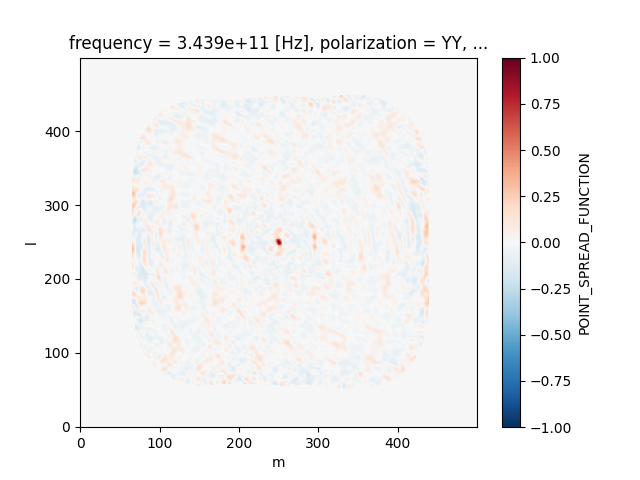

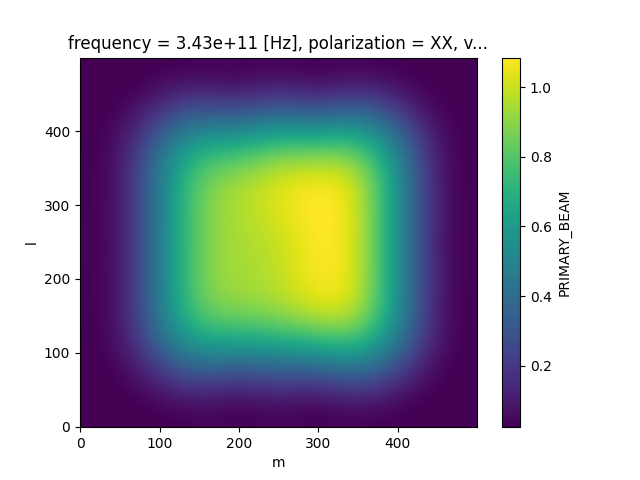

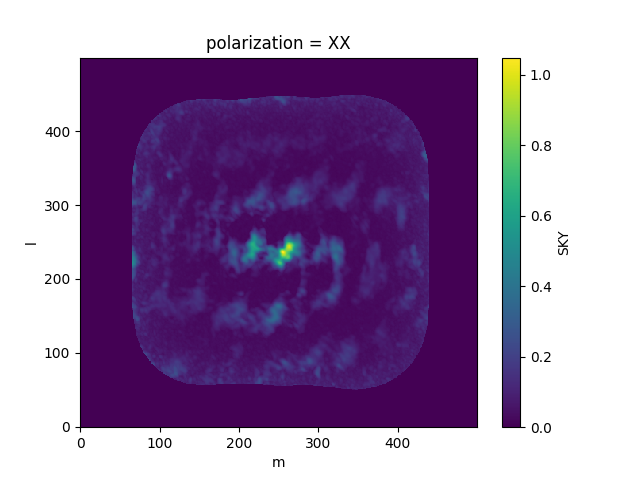

In [6]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.figure()
img_xds.POINT_SPREAD_FUNCTION.isel(polarization=1, frequency=82).plot()
plt.figure()
img_xds.PRIMARY_BEAM.isel(polarization=0, frequency=0).plot()

plt.figure()
img_xds.SKY.max(dim="frequency").isel(polarization=0).plot()